In [8]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [9]:
df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/ess_combined_2012_2014.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8147 entries, 0 to 8146
Data columns (total 13 columns):
cntry      8147 non-null object
idno       8147 non-null int64
year       8147 non-null int64
tvtot      8147 non-null int64
ppltrst    8147 non-null int64
pplfair    8147 non-null int64
pplhlp     8147 non-null int64
happy      8147 non-null int64
sclmeet    8147 non-null int64
sclact     8147 non-null int64
gndr       8147 non-null int64
agea       8147 non-null int64
partner    8147 non-null int64
dtypes: int64(12), object(1)
memory usage: 827.6+ KB


,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5,6,3,3,10,5,8,5,4,2,60,1
1,CH,25,6,6,5,7,5,9,3,2,2,59,1
2,CH,26,6,1,8,8,8,7,6,3,1,24,2
3,CH,28,6,4,6,6,7,10,6,2,2,64,1
4,CH,29,6,5,6,7,5,8,7,2,2,55,1


In [10]:
df_2012 = df.loc[df['year'] == 6]
df_2014 = df.loc[df['year'] == 7]

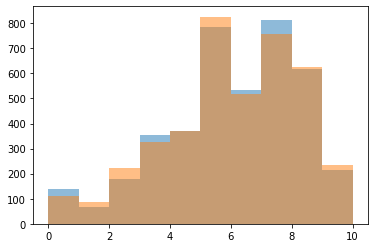

DescribeResult(nobs=4071, minmax=(0, 10), mean=5.578481945467944, variance=4.893040545067073, skewness=-0.5431086926347095, kurtosis=-0.1210956960964813)
DescribeResult(nobs=4076, minmax=(0, 10), mean=5.5713935230618254, variance=4.927171652708959, skewness=-0.4601859476512641, kurtosis=-0.25006786100787215)


In [14]:
plt.hist(df_2012['ppltrst'], alpha = .5)
plt.hist(df_2014['ppltrst'], alpha = .5)
plt.show()

print(stats.describe(df_2012['ppltrst']))
print(stats.describe(df_2014['ppltrst']))

In [15]:
stats.ttest_ind(df_2012['ppltrst'], df_2014['ppltrst'])

Ttest_indResult(statistic=0.1443685081969842, pvalue=0.8852130548889106)

Our p-value is not small enough to determine that people became more trusting from 2012 to 2014.

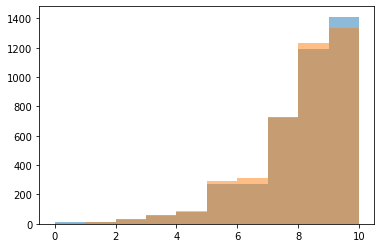

DescribeResult(nobs=4071, minmax=(0, 10), mean=7.731515598133137, variance=3.0819524689826823, skewness=-1.1505518232802756, kurtosis=1.9055890346061979)
DescribeResult(nobs=4076, minmax=(0, 10), mean=7.6854759568204125, variance=2.840436853164115, skewness=-1.0296465664009635, kurtosis=1.5218046596567287)


In [11]:
plt.hist(df_2012['happy'], alpha = .5)
plt.hist(df_2014['happy'], alpha = .5)
plt.show()

print(stats.describe(df_2012['happy']))
print(stats.describe(df_2014['happy']))

In [13]:
stats.kruskal(df_2012['happy'], df_2014['happy'])


KruskalResult(statistic=3.725441202182227, pvalue=0.05358946830655459)

Our p-value is not small enough to determine that people became happier from 2012 to 2014.

In [16]:
df_2014['cntry'].unique()

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a24daea50>,
      dtype=object)

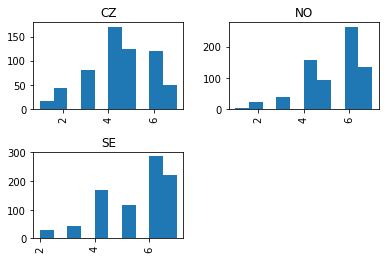

In [22]:
our_countries = ['NO', 'SE', 'CZ']
countries = df_2014[df_2014['cntry'].isin(our_countries)]
countries['cntry'].unique()

countries['sclmeet'].hist(by = countries['cntry'])

In [23]:
stats.kruskal(countries.loc[countries['cntry']=='CZ', ['sclmeet']],
             countries.loc[countries['cntry']=='NO', ['sclmeet']],
             countries.loc[countries['cntry']=='SE', ['sclmeet']])

KruskalResult(statistic=162.95241729022774, pvalue=4.1241284089954195e-36)

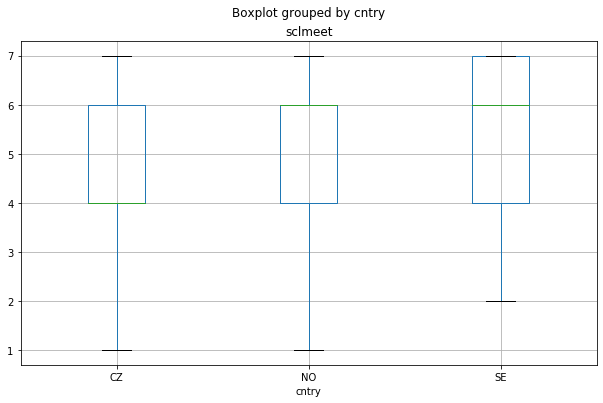

In [24]:
countries.boxplot('sclmeet', by='cntry', figsize=(10, 6))